In [2]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import argparse
import joblib
import os
import sys
import copy
from typing import List, Any

from seq_graph_retro.utils.parse import get_reaction_info, extract_leaving_groups
from seq_graph_retro.molgraph import MultiElement
from seq_graph_retro.utils.chem import apply_edits_to_mol, get_mol
from seq_graph_retro.utils import str2bool

ReactionInfo(rxn_smi='[NH2:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12.[O:1]=[C:2]([c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1)[OH:31]>>[O:1]=[C:2]([NH:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12)[c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1', core={2, 3}, core_edits=['2:3:1.0:0.0'], lg_edits=['2:31:0.0:1.0'], attach_atoms=[[1], []], rxn_class=6)
rxn_smi:[NH2:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12.[O:1]=[C:2]([c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1)[OH:31]>>[O:1]=[C:2]([NH:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12)[c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1
core:{2, 3}
core_ed

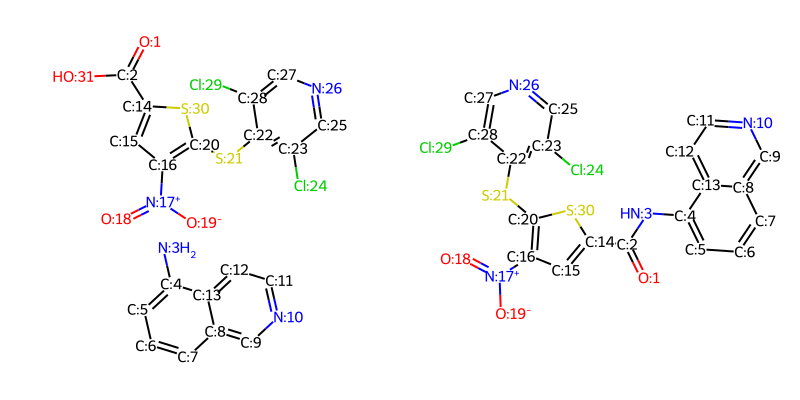

In [7]:
rxn_smi='[NH2:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12.[O:1]=[C:2]([c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1)[OH:31]>>[O:1]=[C:2]([NH:3][c:4]1[cH:5][cH:6][cH:7][c:8]2[cH:9][n:10][cH:11][cH:12][c:13]12)[c:14]1[cH:15][c:16]([N+:17](=[O:18])[O-:19])[c:20]([S:21][c:22]2[c:23]([Cl:24])[cH:25][n:26][cH:27][c:28]2[Cl:29])[s:30]1'
r, p = rxn_smi.split(">>")
rxn_class=6
reaction_info = get_reaction_info(rxn_smi, kekulize=True,use_h_labels=True,rxn_class=rxn_class)
print(reaction_info)
attributes = ['rxn_smi', 'core', 'core_edits', 'lg_edits', 'attach_atoms', 'rxn_class']
# 遍历属性列表并打印
for attr in attributes:
    value = getattr(reaction_info, attr)
    print(f"{attr}:{value}")

#绘图
smiles=[r,p]
mol=[Chem.MolFromSmiles(s) for s in smiles]
img = Draw.MolsToGridImage(mol,molsPerRow=2,subImgSize=(400,400))
display(img)

# get_reaction_info()函数的实现

### get_bond_info(): 获取分子中的键信息函数

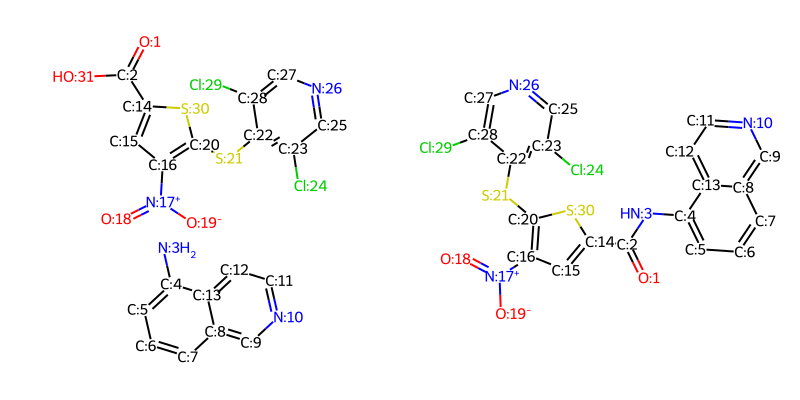

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29}
{(3, 4): [1.0, 0], (4, 5): [1.5, 1], (5, 6): [1.5, 2], (6, 7): [1.5, 3], (7, 8): [1.5, 4], (8, 9): [1.5, 5], (9, 10): [1.5, 6], (10, 11): [1.5, 7], (11, 12): [1.5, 8], (12, 13): [1.5, 9], (1, 2): [2.0, 10], (2, 14): [1.0, 11], (14, 15): [1.5, 12], (15, 16): [1.5, 13], (16, 17): [1.0, 14], (17, 18): [2.0, 15], (17, 19): [1.0, 16], (16, 20): [1.5, 17], (20, 21): [1.0, 18], (21, 22): [1.0, 19], (22, 23): [1.5, 20], (23, 24): [1.0, 21], (23, 25): [1.5, 22], (25, 26): [1.5, 23], (26, 27): [1.5, 24], (27, 28): [1.5, 25], (28, 29): [1.0, 26], (20, 30): [1.5, 27], (2, 31): [1.0, 28], (4, 13): [1.5, 29], (14, 30): [1.5, 30], (8, 13): [1.5, 31], (22, 28): [1.5, 32]}
{(1, 2): [2.0, 0], (2, 3): [1.0, 1], (3, 4): [1.0, 2], (4, 5): [1.5, 3], (5, 6): [1.5, 4], (6, 7): [1.5, 5], (7, 

In [13]:
from rdkit import Chem
from typing import List, Dict, Tuple, Set
from collections import namedtuple, deque
ReactionInfo = namedtuple("ReactionInfo", ['rxn_smi', 'core', 'core_edits', 'lg_edits', 'attach_atoms', 'rxn_class'])
from seq_graph_retro.utils.chem import apply_edits_to_mol, get_mol, get_sub_mol
from seq_graph_retro.molgraph.mol_features import BOND_FLOAT_TO_TYPE
from seq_graph_retro.molgraph import MultiElement
def get_bond_info(mol: Chem.Mol) -> Dict:   #此函数获得分子中键的信息
    if mol is None:
        return {}

    bond_info = {}
    for bond in mol.GetBonds():
        a_start = bond.GetBeginAtom().GetAtomMapNum()
        a_end = bond.GetEndAtom().GetAtomMapNum()

        key_pair = sorted([a_start, a_end])
        bond_info[tuple(key_pair)] = [bond.GetBondTypeAsDouble(), bond.GetIdx()]

    return bond_info
r, p = rxn_smi.split(">>")

#绘图
smiles=[r,p]
mol=[Chem.MolFromSmiles(s) for s in smiles]
img = Draw.MolsToGridImage(mol,molsPerRow=2,subImgSize=(400,400))
display(img)

reac_mol = get_mol(r)   #得到mol表达，其中，苯环的键变为单双键交替
prod_mol = get_mol(p)
#GetAtomMapNum():原子中的标识符，可以画在图片中，只有存在才会返回，不会再则为0
#GetIdx():原子的默认索引号，从0开始，每个原子都会有，逐渐+1
p_amap_idx = {atom.GetAtomMapNum(): atom.GetIdx() for atom in prod_mol.GetAtoms()}
print(p_amap_idx)

#获取键信息
p_bond_info=get_bond_info(prod_mol)
r_bond_info=get_bond_info(reac_mol)
print(r_bond_info)
print(p_bond_info)

# BOND_TYPES = [None, Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE, \
#     Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]
# BOND_FLOAT_TO_TYPE = {
#     0.0: BOND_TYPES[0], 无键
#     1.0: BOND_TYPES[1], 单键
#     2.0: BOND_TYPES[2], 双键
#     3.0: BOND_TYPES[3], 三键
#     1.5: BOND_TYPES[4], 苯环键
# }

### get_reaction_core函数的实现：获取给定反应的反应和编辑中心core_edits和rxn_core

In [8]:
#确保在化学反应中，反应物（reactants）和产物（product）之间在芳香环上的键序保持一致。
#处理了从芳香性结构转换为Kekulé结构时，保持原有芳香环中未改变键的键序相同的问题
def align_kekule_pairs(r: str, p: str) -> Tuple[Chem.Mol, Chem.Mol]:
    reac_mol = Chem.MolFromSmiles(r)
    max_amap = max([atom.GetAtomMapNum() for atom in reac_mol.GetAtoms()])
    for atom in reac_mol.GetAtoms():
        if atom.GetAtomMapNum() == 0:
            atom.SetAtomMapNum(max_amap + 1)
            max_amap = max_amap + 1

    prod_mol = Chem.MolFromSmiles(p)

    prod_prev = get_bond_info(prod_mol)
    Chem.Kekulize(prod_mol)
    prod_new = get_bond_info(prod_mol)

    reac_prev = get_bond_info(reac_mol)
    Chem.Kekulize(reac_mol)
    reac_new = get_bond_info(reac_mol)

    for bond in prod_new:
        if bond in reac_new and (prod_prev[bond][0] == reac_prev[bond][0]):
            reac_new[bond][0] = prod_new[bond][0]

    reac_mol = Chem.RWMol(reac_mol)
    amap_idx = {atom.GetAtomMapNum(): atom.GetIdx() for atom in reac_mol.GetAtoms()}

    for bond in reac_new:
        idx1, idx2 = amap_idx[bond[0]], amap_idx[bond[1]]
        bo = reac_new[bond][0]
        reac_mol.RemoveBond(idx1, idx2)
        reac_mol.AddBond(idx1, idx2, BOND_FLOAT_TO_TYPE[bo])

    return reac_mol.GetMol(), prod_mol

#获取给定反应的反应和编辑中心
def get_reaction_core(r: str, p: str, kekulize: bool = False, use_h_labels: bool = False) -> Tuple[Set, List]:
    reac_mol = get_mol(r)
    prod_mol = get_mol(p)

    if reac_mol is None or prod_mol is None:
        return set(), []

    if kekulize:
        reac_mol, prod_mol = align_kekule_pairs(r, p)
    #得到产物键的信息和原子标号信息
    prod_bonds = get_bond_info(prod_mol)
    p_amap_idx = {atom.GetAtomMapNum(): atom.GetIdx() for atom in prod_mol.GetAtoms()}

    #这里给反应物中每个原子标上序号，为了更好地获取反应物中键的信息
    max_amap = max([atom.GetAtomMapNum() for atom in reac_mol.GetAtoms()])
    for atom in reac_mol.GetAtoms():
        if atom.GetAtomMapNum() == 0:
            atom.SetAtomMapNum(max_amap + 1)
            max_amap += 1
    #得到反应物键的信息和原子标号信息
    reac_bonds = get_bond_info(reac_mol)
    reac_amap = {atom.GetAtomMapNum(): atom.GetIdx() for atom in reac_mol.GetAtoms()}

    rxn_core = set()
    core_edits = []

    for bond in prod_bonds: #遍历product中的所有键
        #产物中的键在反应物中，并且键的类型不相等，说明该键类型改变了，更新到core_edits和rxn_core中
        if bond in reac_bonds and prod_bonds[bond][0] != reac_bonds[bond][0]:
            a_start, a_end = bond
            prod_bo, reac_bo = prod_bonds[bond][0], reac_bonds[bond][0]

            a_start, a_end = sorted([a_start, a_end])
            edit = f"{a_start}:{a_end}:{prod_bo}:{reac_bo}"
            core_edits.append(edit)
            rxn_core.update([a_start, a_end])
        #产物中的键不在反应物中，说明该键断开了，更新到core_edits和rxn_core中
        if bond not in reac_bonds:
            a_start, a_end = bond
            reac_bo = 0.0
            prod_bo = prod_bonds[bond][0]

            start, end = sorted([a_start, a_end])
            edit = f"{a_start}:{a_end}:{prod_bo}:{reac_bo}"
            core_edits.append(edit)
            rxn_core.update([a_start, a_end])

    for bond in reac_bonds: #遍历反应物的键
        #如果反应物中有键不再产物中，说明是新加入的键
        if bond not in prod_bonds:
            amap1, amap2 = bond
            #此时说明新加的键两边的原子都在产物中，说明是合键，也加入core_edits和rxn_core中
            #这里reactions中多出的键就不需要了，因为不涉及products中的键
            if (amap1 in p_amap_idx) and (amap2 in p_amap_idx):
                a_start, a_end = sorted([amap1, amap2])
                reac_bo = reac_bonds[bond][0]
                edit = f"{a_start}:{a_end}:{0.0}:{reac_bo}"
                core_edits.append(edit)
                rxn_core.update([a_start, a_end])

    if use_h_labels:    #是否使用h_labels,这里是使用
        if len(rxn_core) == 0:
            for atom in prod_mol.GetAtoms():
                amap_num = atom.GetAtomMapNum()
                #计算产物和反应物这个atom的氢原子数量
                numHs_prod = atom.GetTotalNumHs()
                numHs_reac = reac_mol.GetAtomWithIdx(reac_amap[amap_num]).GetTotalNumHs()
                #如果这个atom的氢原子数量不一致，则加入core_edits和rxn_core中
                if numHs_prod != numHs_reac:
                    edit = f"{amap_num}:{0}:{1.0}:{0.0}"
                    core_edits.append(edit)
                    rxn_core.add(amap_num)

    return rxn_core, core_edits

r, p = rxn_smi.split(">>")
reac_mol = get_mol(r)   #得到mol表达，其中，苯环的键变为单双键交替
prod_mol = get_mol(p)

rxn_core, core_edits = get_reaction_core(r, p, kekulize=True, use_h_labels=True)